In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
ghg = pd.read_csv(f'./../TEAM-Kenya_data_out/dashboard-data-out/ghg-byfuel.csv')
ghg

,Year,Scenario,Tech.VehType,Tech.Fuel,Value
0,2015,"Omoka (""Growth"")",Motorcycle,Gasoline,3.337858
1,2015,"Omoka (""Growth"")",Car,Gasoline,2.477535
2,2015,"Omoka (""Growth"")",Car,Diesel,1.348820
3,2015,"Omoka (""Growth"")",Bus,Diesel,5.339177
4,2015,"Omoka (""Growth"")",Bus,Gasoline,0.038827
...,...,...,...,...,...
275,2050,Streetfighting,Truck,"Biodiesel (FT, synthetic)",0.571074
276,2050,Streetfighting,Truck,Bioethanol(85)-petrol(15) blend,0.213876
277,2050,Streetfighting,Train,Diesel,0.388805
278,2050,Streetfighting,Ship,Diesel,2.239152


In [3]:
# load gdp growth data (this was exog input)
gdp_gr = pd.read_excel('./data/gdp-gr.xlsx')
gdp_gr

,Year,omoka,electricdreams,kujinao,streetfighting
0,2012,5.520000,5.060000,4.600000,3.680000
1,2013,2.395525,2.195898,1.996271,1.597017
2,2014,3.847896,3.527238,3.206580,2.565264
3,2015,3.884040,3.560370,3.236700,2.589360
4,2016,1.317489,1.207699,1.097908,0.878326
...,...,...,...,...,...
84,2096,6.674903,6.118661,5.562419,4.449936
85,2097,6.684722,6.127662,5.570601,4.456481
86,2098,6.694370,6.136506,5.578642,4.462914
87,2099,6.703853,6.145199,5.586544,4.469236


In [4]:
# make a time series of GDP using the 2012 value and the percentage growth in the model

gdp_2012 = 1289.78  # Kenya GDP PER CAPITA in 2012

chart_data = {}
for scenario in ['omoka', 'electricdreams', 'kujinao', 'streetfighting']:
    
    # load ghg data
    ghg_data = pd.read_csv(f'./../TEAM-Kenya_data_out/dashboard-data-out/ghg-byveh-{scenario}.csv')
    
    gdp_gr_series = gdp_gr[(gdp_gr['Year'] >= 2015) & (gdp_gr['Year'] <= 2050)][scenario].tolist()

    gdp_series = [gdp_2012]
    
    for p in gdp_gr_series:
        gdp_series.append((1+ p/100)*gdp_series[-1])
    
    ghg_series = []
    for year in range(2015, 2051):
        ghg_series.append(ghg_data[ghg_data['Year'] == year]['Value'].sum())
    
    ghg_intensity = []
    for i in range(len(range(2015, 2051))):
        ghg_intensity.append(ghg_series[i]*1000 / gdp_series[i]) # MtCO2/$
        
    chart_data[scenario] = ghg_intensity

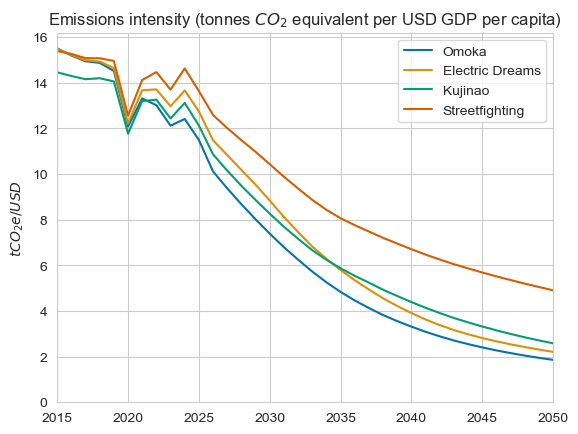

In [5]:
legend_labels = {'omoka':'Omoka', 'electricdreams': 'Electric Dreams', 'kujinao': 'Kujinao', 'streetfighting': 'Streetfighting'}

fig, ax = plt.subplots()
clrs = sns.color_palette('colorblind')

cnt = 0
for scenario in ['omoka', 'electricdreams', 'kujinao', 'streetfighting']:
    ax.plot(range(2015, 2051), chart_data[scenario], color=clrs[cnt], label=legend_labels[scenario])
    
    cnt += 1
    
ax.legend()
ax.set_ylabel('$tCO_{2}e/USD$')
ax.set_ylim(bottom=0)
ax.set_xlim(left=2015, right=2050)
ax.set_title('Emissions intensity (tonnes $CO_{2}$ equivalent per USD GDP per capita)')

plt.savefig('emissions-intensity.pdf')